## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

1. Descripción del Proyecto
Objetivo: Crear un modelo de machine learning que pueda clasificar automáticamente el sentimiento (positivo/negativo) de las reseñas de aplicaciones en Google Play Store.
Dataset: Reviews de aplicaciones de Google Play Store

Fuente: https://www.kaggle.com/datasets/lava18/google-play-store-apps
Tipo de problema: Clasificación de texto (NLP)
Técnicas principales: Procesamiento de lenguaje natural, clasificación binaria

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
# Cargamos la data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Bootcamp_UDD/M7/Proyecto_M7/googleplaystore_user_reviews.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Miramos los primeros registros
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


OBS: los textos de review del dataset ya vienen todos traducidos al idioma inglés

In [4]:
# Verificamos si es que hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [5]:
# Eliminamos los valores nulos
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [6]:
# Verificamos que las clases estén balanceadas (de la variable que trataremos de predecir)
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,23998
Negative,8271
Neutral,5158


Debido a que las clases están altamente desbalanceadas, haremos un undersampling para dejar todas con la cantidad de la clase con menos registros

In [7]:
# Hacemos undersampling para dejar todas las clases con la misma cantidad de la clase Neutral
from sklearn.utils import resample

# Encontrar tamaño de clase minoritaria
min_size = df['Sentiment'].value_counts().min()

# Balancear cada clase
balanced_parts = []
for sentiment in ['Positive', 'Negative', 'Neutral']:
    class_data = df[df['Sentiment'] == sentiment]
    balanced_class = resample(class_data, n_samples=min_size, random_state=42)
    balanced_parts.append(balanced_class)

# Combinar y mezclar
df = pd.concat(balanced_parts, ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar resultado
print(df['Sentiment'].value_counts())

Sentiment
Neutral     5158
Negative    5158
Positive    5158
Name: count, dtype: int64


In [8]:
# Verificamos el tamaño final del dataset reducido
df.shape

(15474, 5)

In [9]:
# Ejemplo de un review positivo
print(df[df['Sentiment'] == 'Positive'].sample(n=1)['Translated_Review'].values[0])

How log box. I love using 10yr.


In [10]:
# Ejemplo de un review negativo
print(df[df['Sentiment'] == 'Negative'].sample(n=1)['Translated_Review'].values[0])

Very bad joke


In [40]:
# Ejemplo de un review neutral
print(df[df['Sentiment'] == 'Neutral'].sample(n=1)['Translated_Review'].values[0])

install lost money r reply ixigo customer care going file case site booked delhi cochin th july today th august get money ticket yet


## Preprocesado

In [12]:
# Eliminamos las columnas que no usaremos para el modelo (sólo dejaremos el texto de review y el sentimiento)
df = df.drop(columns=['App', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])
df.head()

,Translated_Review,Sentiment
0,Recommandable navigation Recommended navigation,Neutral
1,It kind boring I give three see I guess bad I ...,Negative
2,Pixel XL - Forced phone landscape nothing soli...,Negative
3,I downloaded cause people next door likes work...,Neutral
4,Great,Positive


In [13]:
# Transformamos a numérica la variable que trataremos de predecir
df['target'] = df['Sentiment'].map({
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2})

print(df['target'].value_counts().sort_index())

target
0    5158
1    5158
2    5158
Name: count, dtype: int64


In [14]:
# Definimos la función para la limpieza de textos de review
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = stopwords.words('english') # Definimos las Stopwords
lemmatizer = WordNetLemmatizer()

def data_preprocessing(text):

  # Limpieza de datos
  text = re.sub(r'http\S+|www.\S+', '', text) # # Eliminamos URLs
  text = re.sub(re.compile('<.*?>'), '', text) # Removemos tags HTML
  text =  re.sub('[^A-Za-z]+', ' ', text) # Tomamos solo las palabras
  text = re.sub('\s+', ' ', text).strip()  # Normalizar espacios
  text = text.lower() # Convertimos todo a minúsculas

  # Tokenización
  tokens = nltk.word_tokenize(text)

  # Removemos las stopwords
  text = [word for word in tokens if word not in stop_words]

  # Lematización
  text = [lemmatizer.lemmatize(word) for word in text]

  # Unimos las palabras
  text = ' '.join(text)

  return text

# Aplicamos el preprocesamiento al texto
df['Translated_Review'] = df['Translated_Review'].apply(lambda text: data_preprocessing(text))
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Translated_Review,Sentiment,target
0,recommandable navigation recommended navigation,Neutral,1
1,kind boring give three see guess bad thought w...,Negative,0
2,pixel xl forced phone landscape nothing solid ...,Negative,0
3,downloaded cause people next door like work re...,Neutral,1
4,great,Positive,2
...,...,...,...
15469,hate pay draw u try make pitcher work look wei...,Negative,0
15470,theone,Neutral,1
15471,retarded accept payment option tried four diff...,Negative,0
15472,video quality great big issue ad like see addr...,Positive,2


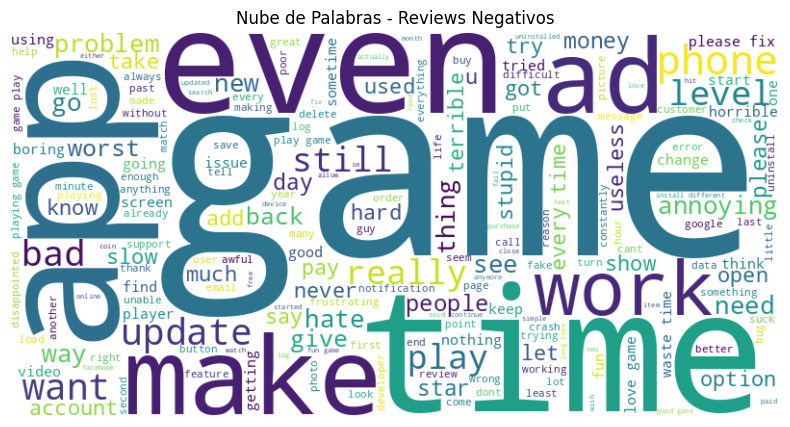

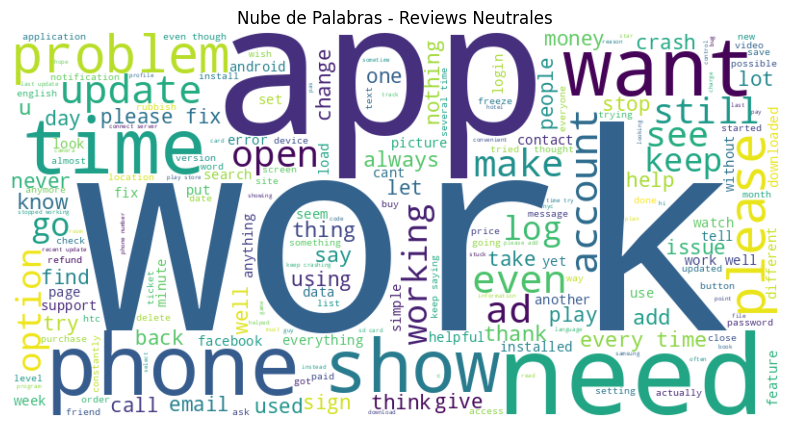

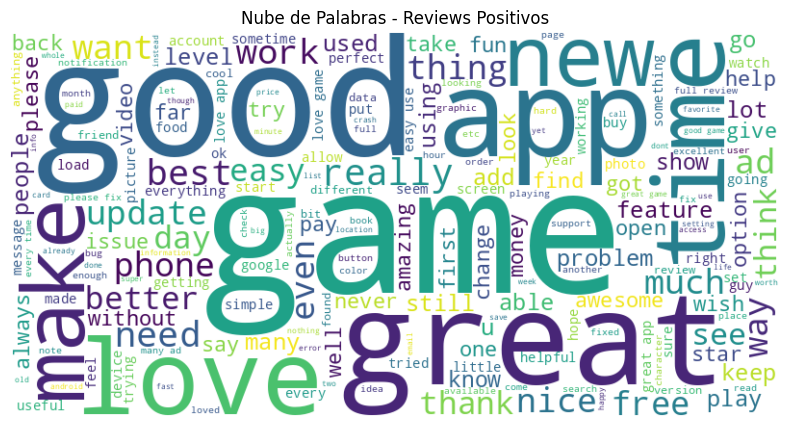

In [15]:
# Con los textos limpios visualizaremos las palabras más frecuentes en cada clase mediante Nubes de palabras

from wordcloud import WordCloud

# Texto de reviews negativos
rev_neg = ' '.join(df[df['target'] == 0]['Translated_Review'])

# Texto de reviews neutrales
rev_neu = ' '.join(df[df['target'] == 1]['Translated_Review'])

# Texto de reviews positivos
rev_pos = ' '.join(df[df['target'] == 2]['Translated_Review'])

# Nube de palabras - Reviews negativos
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(rev_neg)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reviews Negativos')
plt.show()

# Nube de palabras - Reviews neutrales
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(rev_neu)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reviews Neutrales')
plt.show()

# Nube de palabras - Reviews positivos
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(rev_pos)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reviews Positivos')
plt.show()

In [16]:
# Separamos los datos en entrenamiento y prueba
y = df['target'].values
X = df['Translated_Review'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

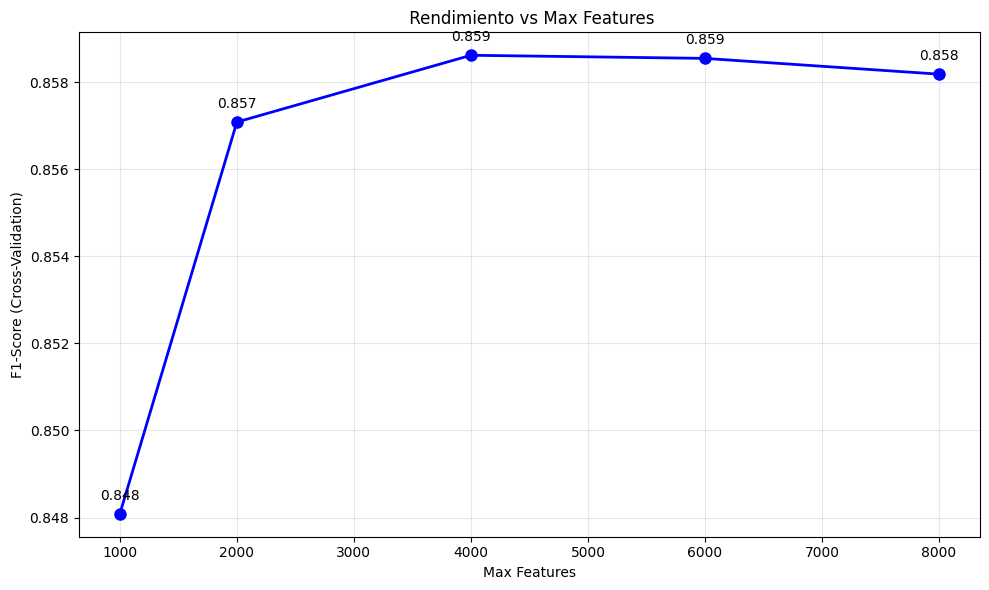

In [19]:
# Antes de hacer la vectorización evaluaremos el número optimo para el parámetro de max_features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Probar diferentes valores
max_features_options = [1000, 2000, 4000, 6000, 8000]
results = []

for max_feat in max_features_options:
    # Crear vectorizer con límite
    vectorizer = TfidfVectorizer(max_features=max_feat)

    # Vectorizar
    X_vectorized = vectorizer.fit_transform(X_train)

    # Entrenar modelo simple
    model = LogisticRegression(random_state=42, max_iter=1000)

    # Cross-validation rápido
    cv_scores = cross_val_score(model, X_vectorized, y_train, cv=3, scoring='f1_macro')

    results.append({
        'max_features': max_feat,
        'f1_score': cv_scores.mean(),
        'f1_std': cv_scores.std()
    })

# Crear gráfica simple
max_feat_values = [r['max_features'] for r in results]
f1_scores = [r['f1_score'] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(max_feat_values, f1_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Max Features')
plt.ylabel('F1-Score (Cross-Validation)')
plt.title(' Rendimiento vs Max Features')
plt.grid(True, alpha=0.3)

# Anotar cada punto
for i, (max_feat, f1) in enumerate(zip(max_feat_values, f1_scores)):
    plt.annotate(f'{f1:.3f}', (max_feat, f1),
                textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

En la gráfica vemos claramente el punto en que los incrementos del rendimiento ya no son significativos, por lo que dejaremos el valor de Max features en 4000.

In [22]:
# Vectorizar la variable X
vectorizer = TfidfVectorizer(max_features=4000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 138760 stored elements and shape (12379, 4000)>

Se utilizó TF-IDF porque es ideal para problemas de clasificación de sentimientos, ya que realza las palabras más informativas y minimiza el ruido de palabras muy comunes.

## Red Neuronal con Keras

Probaremos un modelo predictivo con Red neuronal feedfoward

In [27]:
# Asegurarse de que los datos de entrada sean flotantes
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callback de early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4680 - loss: 1.2508 - val_accuracy: 0.8166 - val_loss: 0.7961
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8204 - loss: 0.6995 - val_accuracy: 0.8813 - val_loss: 0.5311
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9165 - loss: 0.4660 - val_accuracy: 0.9011 - val_loss: 0.4883
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9380 - loss: 0.4187 - val_accuracy: 0.9063 - val_loss: 0.4785
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9526 - loss: 0.3856 - val_accuracy: 0.9079 - val_loss: 0.4709
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9585 - loss: 0.3588 - val_accuracy: 0.9071 - val_loss: 0.4688
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9649 - loss: 0.3420 - val_accuracy: 0.9120 - val_loss: 0.4619
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9726 - loss: 0.3210 - val_accuracy: 0.9043 - v

Se diseñó una red neuronal con tres capas densas (Dense) y activaciones ReLU, combinadas con Dropout para evitar overfitting. La función de pérdida fue sparse_categorical_crossentropy y el optimizador fue Adam, por su eficiencia adaptativa y alto rendimiento en tareas de clasificación multiclase con texto vectorizado. Se incluyó EarlyStopping para entrenar solo lo necesario y evitar sobreajuste. Esta arquitectura es ligera pero efectiva para texto vectorizado mediante TF-IDF, especialmente en un problema de clasificación de tres clases como el análisis de sentimientos de reviews (positivo, negativo, neutral). La configuración de regularización L2 y dropout con tasas de 0.5 y 0.3 proporciona un balance óptimo entre capacidad de aprendizaje y generalización, mientras que el uso de 128 y 64 neuronas en las capas ocultas permite capturar patrones complejos sin incrementar excesivamente la complejidad computacional.

In [28]:
# Hacer predicciones para clasificación multiclase
y_pred_proba = model.predict(X_test)  # Obtener probabilidades
y_pred = np.argmax(y_pred_proba, axis=1)  # Obtener clase con mayor probabilidad

# Evaluar el modelo
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# F1-Score
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (macro): {f1_macro:.4f}")
print(f"F1-Score (weighted): {f1_weighted:.4f}")

# Classification report detallado
target_names = ['Negative', 'Neutral', 'Positive']
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.8985
F1-Score (macro): 0.8986
F1-Score (weighted): 0.8985

 Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      1057
     Neutral       0.90      0.92      0.91      1012
    Positive       0.90      0.88      0.89      1026

    accuracy                           0.90      3095
   macro avg       0.90      0.90      0.90      3095
weighted avg       0.90      0.90      0.90      3095



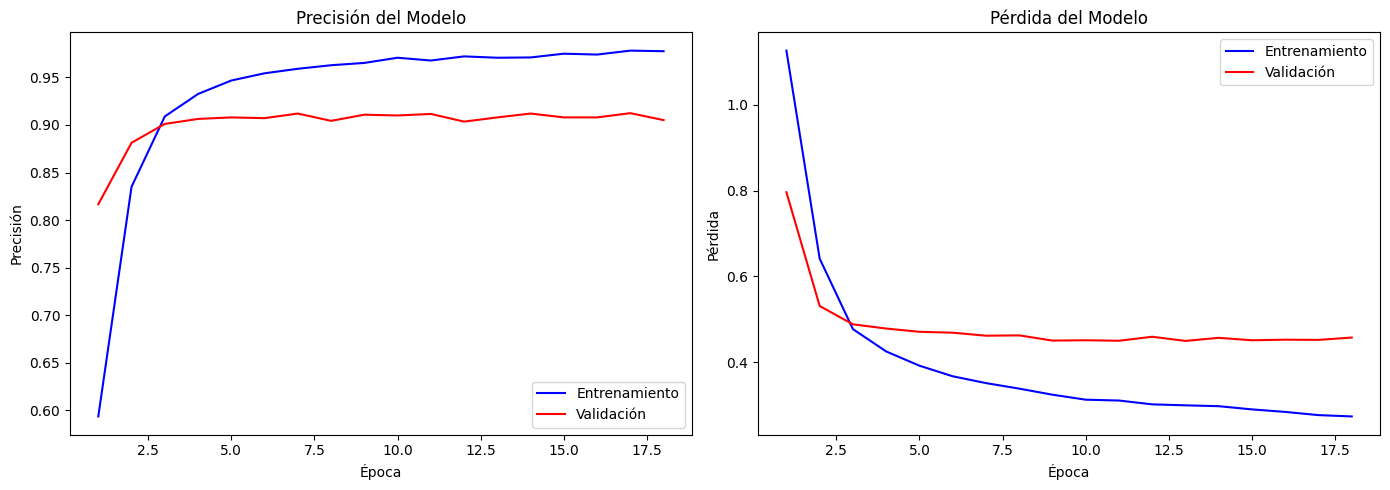

In [29]:
# Extraemos los datos del historial para gracficar la precisión y la pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Graficar precisión
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


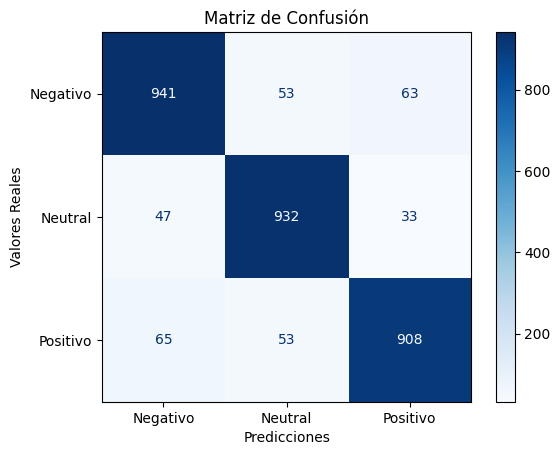

In [35]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negativo", "Neutral", "Positivo"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [39]:
# Probamos predecir con nuevos textos

def test_sentiment(texto):
    texto_limpio = data_preprocessing(texto)
    texto_vector = vectorizer.transform([texto_limpio]).toarray()
    probabilidades = model.predict(texto_vector)[0]  # Sin [0] adicional

    # Encontrar la clase con mayor probabilidad
    clase_predicha = np.argmax(probabilidades)
    confianza = probabilidades[clase_predicha]

    # Mapear a nombres de sentimientos
    sentimientos = ['Negativo', 'Neutral', 'Positivo']
    resultado = sentimientos[clase_predicha]

    return f"{resultado} (confianza: {confianza:.1%})"

# Ejemplos para probar
ejemplos = [
    "The app is ok, nothing special",
    "This app is absolutely amazing!",
    "Terrible app, waste of time"
]

for texto in ejemplos:
    resultado = test_sentiment(texto)
    print(f"'{texto}' \n→ {resultado}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
'The app is ok, nothing special' 
→ Positivo (confianza: 90.2%)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
'This app is absolutely amazing!' 
→ Positivo (confianza: 99.7%)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
'Terrible app, waste of time' 
→ Negativo (confianza: 100.0%)



## Conclusiones

La red neuronal alcanzó un 89.85% de accuracy en el conjunto de prueba tras 18 epocas de entrenamiento con early stopping automático y el classification report muestra un comportamiento balanceado entre las 3 clases.

Las curvas de precisión y pérdida evidencian un entrenamiento exitoso sin overfitting. Las curvas de precisión convergen pero mantienen una diferencia razonable que sugiere buena capacidad de generalización, mientras que la función de pérdida decrece en ambos conjuntos, estabilizándose en valores bajos que confirman la convergencia del modelo.

La matriz de confusión muestra una diagonal principal sólida con 941, 932 y 908 predicciones correctas para las clases Negativo, Neutral y Positivo respectivamente (de aproximadamente 1.000 reviews de cada clase en el conjunto de prueba).

Las pruebas con textos nuevos demuestran la efectividad práctica del modelo. Reviews claramente positivos como "This app is absolutely amazing!" obtienen confianzas del 99.7%, mientras que textos negativos como "Terrible app, waste of time" alcanzan 100% de confianza. Sin embargo, el texto neutral "The app is ok, nothing special" se clasifica como Positivo con 90.2% de confianza, lo que puede indicar que el modelo puede interpretar la neutralidad como ligeramente favorable.

## Tuning

A continuación se realizará pruebas con 3 modelos que se usan frecuentemente en problemas de clasificación, para buscar aquellos parámetros que otorguen mejores resultados

In [42]:
# Tuning de Regresión Logística

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parámetros a optimizar
param_grid_lr = {
    'C': [1, 10],
    'solver': ['liblinear'],
}

# Grid Search
lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid_lr,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_

In [45]:
# Tuning de Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    param_grid_rf,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

In [50]:
# Tuning de red neuronal
# Probar diferentes arquitecturas
def create_nn_model(hidden_units_1=128, hidden_units_2=64, dropout_1=0.5, dropout_2=0.3):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units_1, activation='relu',
                              input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(dropout_1),
        tf.keras.layers.Dense(hidden_units_2, activation='relu'),
        tf.keras.layers.Dropout(dropout_2),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Probar diferentes configuraciones
nn_configs = [
    {'hidden_units_1': 256, 'hidden_units_2': 128},
    {'dropout_1': 0.3, 'dropout_2': 0.2}
]

best_score = 0
best_nn = None

# Early stopping para rapidez
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

for i, config in enumerate(nn_configs):

    # Crear y entrenar modelo
    test_model = create_nn_model(**config)
    history = test_model.fit(
        X_train, y_train,
        epochs=10,
        validation_split=0.15,
        verbose=0,
        callbacks=[early_stopping]
    )

    # Obtener mejor score
    val_accuracy = max(history.history['val_accuracy'])
    print(f"   Accuracy: {val_accuracy:.4f}")

    # Guardar si es el mejor
    if val_accuracy > best_score:
        best_score = val_accuracy
        best_nn = test_model

   Accuracy: 0.9052
   Accuracy: 0.9015


In [51]:
# Comparamos los modelos tuneados
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from tabulate import tabulate

def specificity_per_class(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity_scores = []
    for i in range(len(cm)):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity_scores.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
    return np.mean(specificity_scores)

# Predicciones de tus 3 modelos tuneados
predictions = {
    'Logistic Regression (Tuned)': best_lr.predict(X_test),
    'Random Forest (Tuned)': best_rf.predict(X_test),
    'Neural Network (Tuned)': np.argmax(best_nn.predict(X_test), axis=1)
}

# Calculamos las métricas para cada modelo
metrics_summary = []

for name, preds in predictions.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='macro', zero_division=1)
    recall = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')
    specificity = specificity_per_class(y_test, preds)

    metrics_summary.append([name, accuracy, precision, recall, specificity, f1])

# Creamos una tabla con tabulate
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score']
print(tabulate(metrics_summary, headers=headers, tablefmt='grid'))

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
+-----------------------------+------------+-------------+----------+---------------+------------+
| Model                       |   Accuracy |   Precision |   Recall |   Specificity |   F1 Score |
+=============================+============+=============+==========+===============+============+
| Logistic Regression (Tuned) |   0.903069 |    0.903828 | 0.903269 |      0.951529 |   0.902937 |
+-----------------------------+------------+-------------+----------+---------------+------------+
| Random Forest (Tuned)       |   0.826494 |    0.840215 | 0.827837 |      0.913575 |   0.825622 |
+-----------------------------+------------+-------------+----------+---------------+------------+
| Neural Network (Tuned)      |   0.894346 |    0.894931 | 0.894442 |      0.947061 |   0.894599 |
+-----------------------------+------------+-------------+----------+---------------+------------+


**Conclusiones:** La regresión logística fue el que obtuvo un mejor desempeño, seguido por la red neuronal y por último el random Forest.
Dados estos reusltados, haremos un ensamble de los dos mejores.

## Ensamble

Se seleccionó Stacking como técnica de ensamble por su capacidad superior de meta-aprendizaje. A diferencia de Bagging (que promedia predicciones) o Boosting (que corrige errores secuencialmente), Stacking entrena un meta-modelo que aprende la combinación óptima de predictores base, maximizando la complementariedad entre diferentes algoritmos.

In [54]:
# STACKING con los 2 MEJORES modelos
from sklearn.base import BaseEstimator, ClassifierMixin

class NeuralNetworkWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        self.classes_ = np.array([0, 1, 2])
    def fit(self, X, y):
        return self
    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)
    def predict_proba(self, X):
        return self.model.predict(X)

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

nn_wrapper = NeuralNetworkWrapper(best_nn)

# Modelos base
estimators = [
    ('lr_best', best_lr),
    ('nn_best', nn_wrapper)
]

# Stacking
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Entrenar
stacking_model.fit(X_train, y_train)

# Evaluar
y_pred_stacking = stacking_model.predict(X_test)
f1_stacking = f1_score(y_test, y_pred_stacking, average='macro')

def specificity_per_class(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity_scores = []
    for i in range(len(cm)):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity_scores.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
    return np.mean(specificity_scores)

# Métricas del Stacking
y_pred_stacking = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_stacking)
precision = precision_score(y_test, y_pred_stacking, average='macro')
recall = recall_score(y_test, y_pred_stacking, average='macro')
f1 = f1_score(y_test, y_pred_stacking, average='macro')
specificity = specificity_per_class(y_test, y_pred_stacking)

# Tabla del ensamble
metrics = [['Stacking Ensemble', accuracy, precision, recall, specificity, f1]]
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score']
print(tabulate(metrics, headers=headers, tablefmt='grid'))

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
+-------------------+------------+-------------+----------+---------------+------------+
| Model             |   Accuracy |   Precision |   Recall |   Specificity |   F1 Score |
+===================+============+=============+==========+===============+============+
| Stacking Ensemble |   0.898223 |    0.898814 | 0.898306 |      0.949002 |   0.898433 |
+-------------------+------------+-------------+----------+---------------+------------+


**CONCLUSIONES:** Si bien el ensamble obtuvo mejor desempeño que la red neuronal tuneada, la regresión logística tuneada (por sí sola) sigue siendo mejor, así que se ocupará ese modelo para pasar a productivo.

In [55]:
# Guardamos el modelo de regresión lineal tuneado para pasarlo a productivo
import joblib

joblib.dump(best_lr, 'classifier.pkl')

['classifier.pkl']

In [57]:
# También guardaremos la función para vectorizar el texto
joblib.dump(vectorizer, 'sentiment_vectorizer.pkl')

['sentiment_vectorizer.pkl']